Baigazy Maksat

In [31]:
import torch
from torch import nn
from torch import functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset,Dataset, DataLoader
import torch.utils.data as data_utils
import torch
from torch import nn
from torch import functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import tqdm

In [32]:
df = pd.read_csv('heart.csv', sep = ',')

In [33]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
feature_columns = ['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
target_column = 'target'

In [35]:
train, test = train_test_split(df, test_size=0.2)

In [36]:
X = np.array(df[feature_columns])
# Extract target
y = np.array(df[target_column])

# encode target with target_mapping
y = np.array(df[target_column])

In [37]:
X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0)
X = np.array((X - X_mean)/X_std)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [39]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [40]:
batch_size = 15

In [41]:
dataset =TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset, batch_size, shuffle = False)

In [42]:
testset =TensorDataset(X_test, y_test)
test_loader = DataLoader(testset, batch_size, shuffle = False)

In [43]:
for x,y in train_loader:
    # Print the 'text' data of the batch
    print(x)
    print(y)
    print('------------------')
    break

tensor([[ 0.5110,  0.6810,  1.9731,  1.6206,  0.5167, -0.4176, -1.0058, -1.0778,
         -0.6966, -0.8969,  0.9764, -0.7144, -0.5129],
        [-0.1507,  0.6810,  1.0026, -0.0927, -0.0051,  2.3944, -1.0058,  1.0212,
         -0.6966, -0.8969,  0.9764,  2.2241, -0.5129],
        [-1.4742,  0.6810, -0.9385, -1.2350, -1.4352, -0.4176, -1.0058,  0.3653,
         -0.6966, -0.8969,  0.9764, -0.7144,  1.1230],
        [ 0.6213,  0.6810, -0.9385, -0.0927,  0.1302, -0.4176,  0.8990, -0.2469,
          1.4355,  0.3109,  0.9764,  0.2651,  1.1230],
        [ 0.5110,  0.6810, -0.9385,  0.1928, -0.2370, -0.4176,  0.8990,  0.4965,
         -0.6966, -0.4655, -0.6491, -0.7144,  1.1230],
        [-1.8050,  0.6810,  1.9731, -0.6639, -0.2950, -0.4176,  0.8990,  1.4148,
          1.4355,  2.3814, -0.6491, -0.7144,  1.1230],
        [-1.4742,  0.6810,  1.0026, -1.1208,  0.0722, -0.4176,  0.8990,  1.2836,
         -0.6966, -0.8969,  0.9764, -0.7144, -0.5129],
        [-1.5844,  0.6810,  1.9731,  0.4784, -0.

In [44]:
#Write your own model and correct mistakes if they are
torch.manual_seed(42) 
np.random.seed(42)
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)
    
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epoch = 100

In [45]:
train_losses = []
test_losses = []
for i in range(num_epoch):
    model.train(True)
    epoch_train_losses = []
    
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred.squeeze().squeeze(), y_batch.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_losses.append(loss.item())              
    train_losses.append(np.mean(epoch_train_losses))
    model.train(False)
    with torch.no_grad():
        #add code for validation set
        epoch_test_losses = []
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred.squeeze().squeeze(), y_batch.squeeze())
            epoch_test_losses.append(loss.item())
            if i%20 == 0:
                print(i, 'train loss ',np.mean(epoch_train_losses), ' val loss ', np.mean(epoch_test_losses))
        test_losses.append(np.mean(epoch_test_losses))

0 train loss  0.23127918909577763  val loss  0.1849053055047989
0 train loss  0.23127918909577763  val loss  0.1906391605734825
0 train loss  0.23127918909577763  val loss  0.18395004669825235
0 train loss  0.23127918909577763  val loss  0.18018880486488342
0 train loss  0.23127918909577763  val loss  0.1604348286986351
20 train loss  0.049882894062808616  val loss  0.22478286921977997
20 train loss  0.049882894062808616  val loss  0.20079053193330765
20 train loss  0.049882894062808616  val loss  0.199470654129982
20 train loss  0.049882894062808616  val loss  0.16291546542197466
20 train loss  0.049882894062808616  val loss  0.13033237233757972
40 train loss  0.04007136416210996  val loss  0.21014754474163055
40 train loss  0.04007136416210996  val loss  0.20300383120775223
40 train loss  0.04007136416210996  val loss  0.20180121064186096
40 train loss  0.04007136416210996  val loss  0.18137476406991482
40 train loss  0.04007136416210996  val loss  0.14509981125593185
60 train loss  

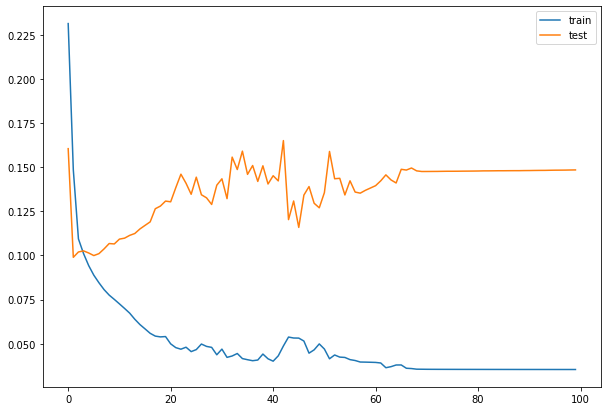

In [46]:
#print both train and test losses on one graph 
plt.figure(figsize=(10,7))
plt.plot(range(len(train_losses)), train_losses, label='train')
plt.plot(range(len(test_losses)), test_losses, label='test')
plt.legend()
plt.show()

In [47]:
y_pred = model.forward(X_test)

In [48]:
y_pred = np.round(y_pred.detach().numpy())

In [49]:
#show your results 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  3]
 [ 9 24]]
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81        28
         1.0       0.89      0.73      0.80        33

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



Theoretical part: 
<br>1) Describe several metrics applied for image segmentation task

- Dice coeff. is 2 * the Area of Overlap divided by the total number of pixels in both images. 
- IoU is the area of overlap between the predicted
segmentation and the ground truth divided by
the area of union between the predicted
segmentation and the ground truth

<br>2) Describe difference between semantic and instance segmentation
- Semantic segmentation treats multiple objects within a single category as one entity.
- Instance segmentation identifies individual objects within these categories.  